In [14]:
import pandas as pd
import numpy as np
import datetime

# Visualization
import matplotlib.pyplot as plt
import descartes
import geopandas

from plot_mexico import plot_mexico

In [2]:
# Datos de entrenamiento
train = pd.read_csv('../data/train.csv', low_memory=False, \
                    encoding = 'utf-8', index_col='id', parse_dates=['fecha'])

In [3]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 240000 entries, 254099 to 121958
Data columns (total 22 columns):
titulo                        234613 non-null object
descripcion                   238381 non-null object
tipodepropiedad               239954 non-null object
direccion                     186928 non-null object
ciudad                        239628 non-null object
provincia                     239845 non-null object
antiguedad                    196445 non-null float64
habitaciones                  217529 non-null float64
garages                       202235 non-null float64
banos                         213779 non-null float64
metroscubiertos               222600 non-null float64
metrostotales                 188533 non-null float64
idzona                        211379 non-null float64
lat                           116512 non-null float64
lng                           116512 non-null float64
fecha                         240000 non-null datetime64[ns]
gimnasio           

In [4]:
train.sample(3)

,titulo,descripcion,tipodepropiedad,direccion,ciudad,provincia,antiguedad,habitaciones,garages,banos,...,idzona,lat,lng,fecha,gimnasio,usosmultiples,piscina,escuelascercanas,centroscomercialescercanos,precio
id,,,,,,,,,,,,,,,,,,,,,
142814,venta casa olivos residencial,"residencia en venta con excelentes acabados, l...",Casa,AV RAMON CORONA 2748 CASA H20,Zapopan,Jalisco,4.0,3.0,2.0,4.0,...,48193.0,NaN,NaN,2016-02-26,1.0,1.0,1.0,1.0,1.0,6000000.0
64871,"casa en condominio horizontal,","dos plantas, sala, comedor , cocina integral, ...",Casa en condominio,Antonio Pliego Villalba 106,Zinacantepec,Edo. de México,1.0,3.0,3.0,2.0,...,53666.0,NaN,NaN,2014-07-22,0.0,0.0,0.0,0.0,0.0,1550000.0
95638,"casa en vta av. de los arcos, f. vista del val...","casa de 3 niveles, consta de sala, comedor, co...",Casa,"Av. de los Arcos, Fracc. Vista del Valle, Secc...",Naucalpan de Juárez,Edo. de México,10.0,3.0,2.0,3.0,...,286425.0,NaN,NaN,2015-11-09,0.0,0.0,0.0,1.0,1.0,2300000.0


In [5]:
tipopropiedades = train.groupby('tipodepropiedad').size() \
    .sort_values(ascending=False).to_frame('cantidad')
tipopropiedades

,cantidad
tipodepropiedad,
Casa,141717
Apartamento,57341
Casa en condominio,19297
Terreno,9945
Local Comercial,3055
Oficina comercial,1741
Bodega comercial,1406
Edificio,1396
Terreno comercial,1326


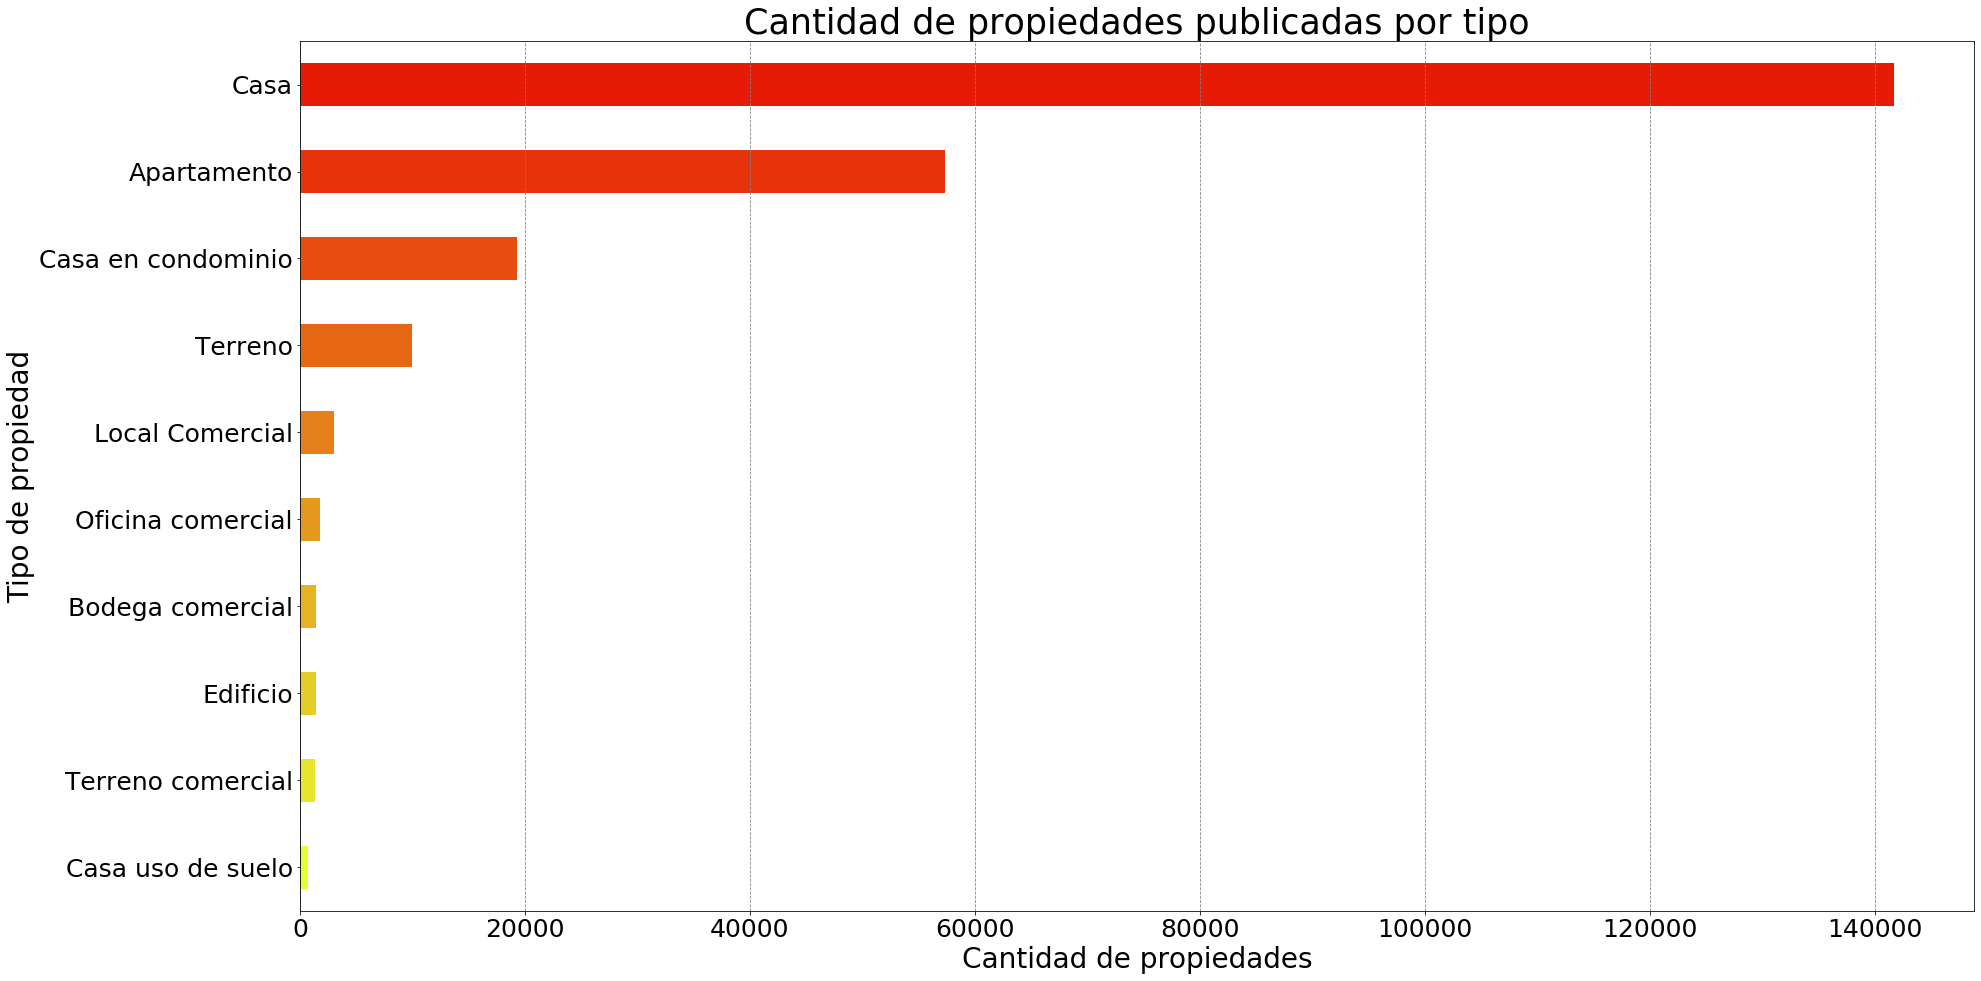

In [6]:
colorsh = []
i = 10
while i != 0:
    colorsh.append((0.9, (i*2)/20, i/50))
    i -= 1

plt = tipopropiedades.sort_values(by='cantidad').tail(10)['cantidad'].plot(kind = 'barh', color = colorsh,\
    figsize = (30, 16), fontsize = 25)
plt.set_xlabel('Cantidad de propiedades', fontsize = 28)
plt.set_ylabel('Tipo de propiedad', fontsize = 28)
plt.set_title('Cantidad de propiedades publicadas por tipo', fontsize = 35)
plt.grid(linestyle = 'dashed', color = 'gray')
plt.yaxis.grid(False);

In [7]:
provincias = train.groupby('provincia')['antiguedad','habitaciones','garages','banos', \
                                         'metroscubiertos','metrostotales'].mean()
provincias['cantidad'] = train.groupby('provincia').size()
provincias

,antiguedad,habitaciones,garages,banos,metroscubiertos,metrostotales,cantidad
provincia,,,,,,,
Aguascalientes,7.524580,3.096447,1.541806,2.120382,176.184227,173.284826,1753
Baja California Norte,5.788405,2.580032,1.613046,1.365226,94.006675,128.017080,3220
Baja California Sur,2.459770,2.633838,1.684280,1.606195,113.391197,182.840849,1700
Campeche,3.914573,2.835749,0.944444,1.963351,164.229592,204.650655,263
Chiapas,5.412871,3.031926,1.324211,2.206164,175.109879,179.228690,1126
Chihuahua,6.518198,3.039927,1.445773,2.133979,199.484038,213.807702,4590
Coahuila,6.306214,3.004758,1.538726,2.138187,198.050117,208.891884,3695
Colima,5.674877,2.790287,1.317982,2.038245,157.389075,178.943596,1008
Distrito Federal,12.189608,2.740684,1.420075,1.986249,156.449348,161.503146,58790


In [8]:
train.groupby('provincia').sum()

,antiguedad,habitaciones,garages,banos,metroscubiertos,metrostotales,idzona,lat,lng,gimnasio,usosmultiples,piscina,escuelascercanas,centroscomercialescercanos,precio
provincia,,,,,,,,,,,,,,,
Aguascalientes,11633.0,4880.0,2305.0,3329.0,279252.0,278642.0,6.052638e+07,23883.590271,-1.118017e+05,86.0,110.0,168.0,984.0,854.0,2.589512e+09
Baja California Norte,15675.0,8140.0,4723.0,4295.0,295745.0,382259.0,9.319219e+07,55048.498456,-1.980587e+05,41.0,34.0,54.0,1517.0,1520.0,2.471162e+09
Baja California Sur,3852.0,4172.0,2550.0,2541.0,182900.0,275724.0,4.181732e+07,24817.258955,-1.153414e+05,11.0,5.0,73.0,483.0,230.0,2.067970e+09
Campeche,779.0,587.0,204.0,375.0,32189.0,46865.0,4.735278e+06,2606.028923,-1.238800e+04,4.0,1.0,7.0,73.0,59.0,4.131514e+08
Chiapas,5467.0,2944.0,1258.0,2076.0,173709.0,172418.0,1.967401e+07,7695.096312,-4.289882e+04,33.0,8.0,32.0,376.0,234.0,2.166566e+09
Chihuahua,18805.0,11725.0,5079.0,8378.0,849802.0,855017.0,4.272449e+08,58946.658029,-2.153591e+05,117.0,27.0,93.0,1212.0,929.0,8.007396e+09
Coahuila,19688.0,10105.0,4927.0,7195.0,679708.0,682032.0,1.081370e+08,49453.874068,-1.959385e+05,87.0,24.0,51.0,1588.0,1038.0,5.562104e+09
Colima,4608.0,2528.0,1202.0,1812.0,141178.0,152281.0,9.487953e+06,11195.823360,-6.056384e+04,15.0,22.0,92.0,385.0,258.0,1.543631e+09
Distrito Federal,630800.0,147912.0,74091.0,106163.0,8738009.0,6160053.0,3.414342e+11,647385.955047,-3.304767e+06,4410.0,4044.0,2627.0,28118.0,26185.0,2.041015e+11


In [9]:
mexstates = geopandas.read_file('../data/estados_mexico.shp');
mexstates.head()

,ADMIN_NAME,OBJECTID,FIPS_ADMIN,GMI_ADMIN,FIPS_CNTRY,GMI_CNTRY,CNTRY_NAME,POP_ADMIN,TYPE_ENG,TYPE_LOC,SQKM,SQMI,COLOR_MAP,Shape_Leng,Shape_Area,geometry
0,Aguascalientes,1057,MX01,MEX-AGS,MX,MEX,Mexico,782890,State,Estado,5609.14,2165.69,4,2.807425,0.489324,POLYGON ((-101.8462066646057 22.01176071158773...
1,Baja California,2304,MX02,MEX-BCN,MX,MEX,Mexico,1806829,State,Estado,72725.41,28079.28,7,19.898878,6.831258,(POLYGON ((-115.0172424311931 31.9544296261265...
2,Baja California Sur,2327,MX03,MEX-BCS,MX,MEX,Mexico,345682,State,Estado,72278.30,27906.65,8,26.273035,6.500703,(POLYGON ((-112.7232818599697 27.9997406003486...
3,Campeche,1086,MX04,MEX-CMP,MX,MEX,Mexico,582193,State,Estado,50234.82,19395.66,6,13.547013,4.294054,(POLYGON ((-90.37896728551169 20.8632316585143...
4,Chiapas,1182,MX05,MEX-CHP,MX,MEX,Mexico,3524501,State,Estado,73771.48,28483.17,10,12.835232,6.223150,(POLYGON ((-92.10794067392283 15.4375972749944...


In [10]:
columnas = ['antiguedad','habitaciones','garages','banos','metroscubiertos','metrostotales','cantidad']
mexstates[columnas] = provincias.reset_index()[columnas]
mexstates.head()

,ADMIN_NAME,OBJECTID,FIPS_ADMIN,GMI_ADMIN,FIPS_CNTRY,GMI_CNTRY,CNTRY_NAME,POP_ADMIN,TYPE_ENG,TYPE_LOC,...,Shape_Leng,Shape_Area,geometry,antiguedad,habitaciones,garages,banos,metroscubiertos,metrostotales,cantidad
0,Aguascalientes,1057,MX01,MEX-AGS,MX,MEX,Mexico,782890,State,Estado,...,2.807425,0.489324,POLYGON ((-101.8462066646057 22.01176071158773...,7.524580,3.096447,1.541806,2.120382,176.184227,173.284826,1753
1,Baja California,2304,MX02,MEX-BCN,MX,MEX,Mexico,1806829,State,Estado,...,19.898878,6.831258,(POLYGON ((-115.0172424311931 31.9544296261265...,5.788405,2.580032,1.613046,1.365226,94.006675,128.017080,3220
2,Baja California Sur,2327,MX03,MEX-BCS,MX,MEX,Mexico,345682,State,Estado,...,26.273035,6.500703,(POLYGON ((-112.7232818599697 27.9997406003486...,2.459770,2.633838,1.684280,1.606195,113.391197,182.840849,1700
3,Campeche,1086,MX04,MEX-CMP,MX,MEX,Mexico,582193,State,Estado,...,13.547013,4.294054,(POLYGON ((-90.37896728551169 20.8632316585143...,3.914573,2.835749,0.944444,1.963351,164.229592,204.650655,263
4,Chiapas,1182,MX05,MEX-CHP,MX,MEX,Mexico,3524501,State,Estado,...,12.835232,6.223150,(POLYGON ((-92.10794067392283 15.4375972749944...,5.412871,3.031926,1.324211,2.206164,175.109879,179.228690,1126


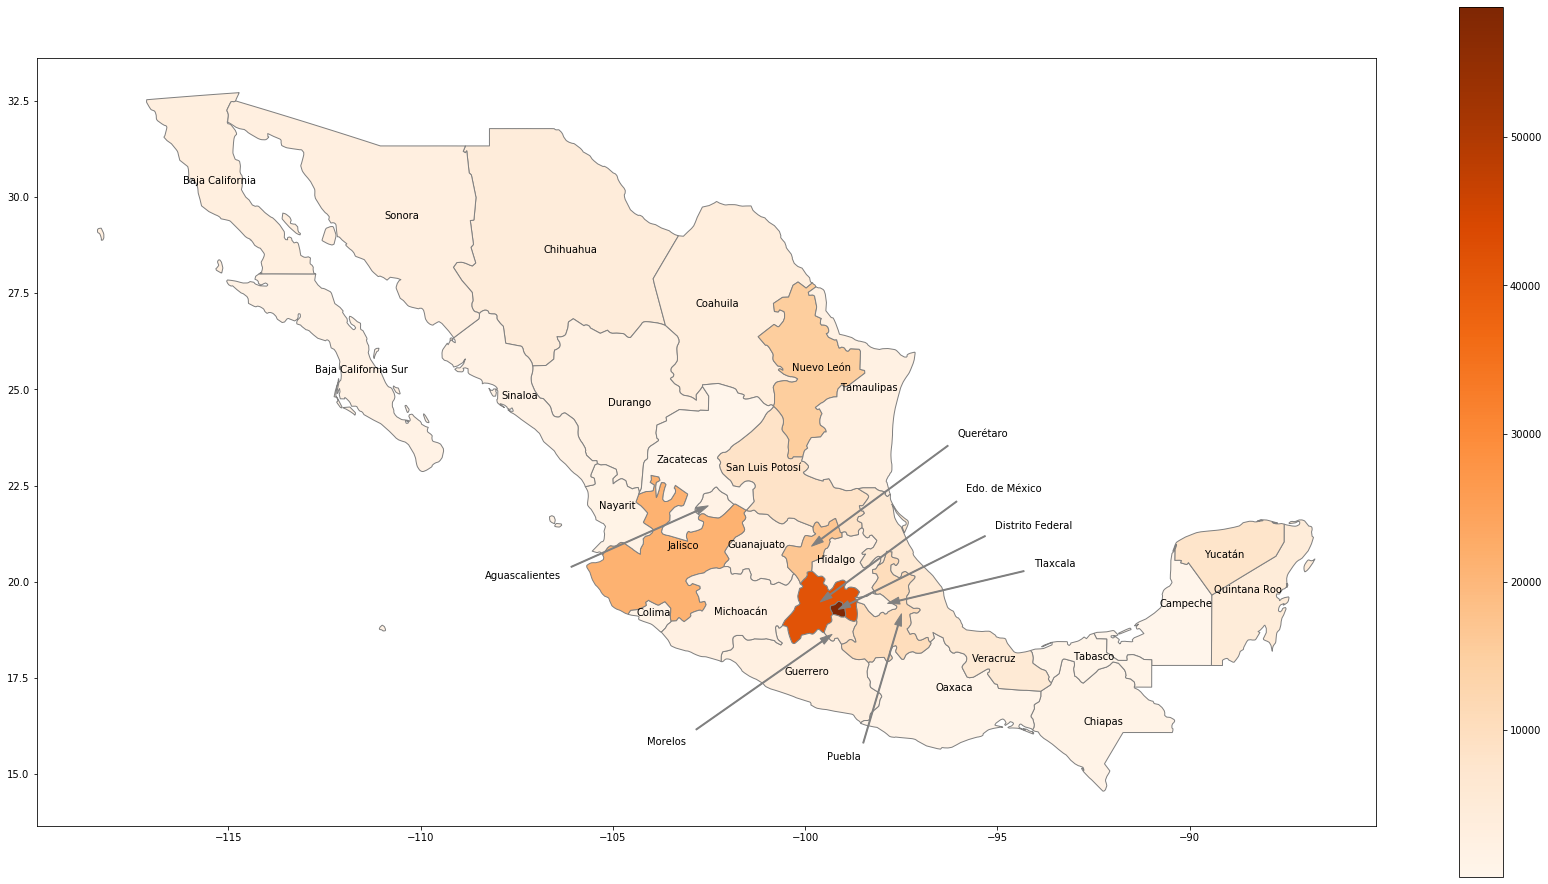

In [15]:
plot_mexico(mexstates, 'cantidad')